<a href="https://colab.research.google.com/github/ngabo-dev/linear_regression_model/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Task 1: Linear Regression Task


Data Handling and Processing

In [83]:
# Data Handling & Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning: Preprocessing & Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree

# Model Saving & Loading
import joblib

Load and explore the dataset

In [84]:

# Load the dataset
df = pd.read_csv("Students_Grading_Dataset.csv")

# Display the first few rows
print(df.head())

# Get dataset summary
print(df.info())

# Check for missing values
print(df.isnull().sum())

  Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65   

Data Preprocessing: Categorical Variable Encoding and Missing Value Imputation.

In [85]:
# Drop unnecessary columns
columns_to_drop = [
    "Student_ID", "First_Name", "Last_Name", "Email", "Gender", "Age",  
    "Extracurricular_Activities", "Internet_Access_at_Home",  
    "Parent_Education_Level", "Family_Income_Level", "Final_Score"
]
df.drop(columns=columns_to_drop, inplace=True)

# Handle missing values - Fill numeric columns with mean
imputer = SimpleImputer(strategy="mean")
df[df.select_dtypes(include=["number"]).columns] = imputer.fit_transform(df.select_dtypes(include=["number"]))

# One-hot encode 'Department'
df = pd.get_dummies(df, columns=["Department"], drop_first=True)

# Verify changes
print(df.head())
print(df.info())

   Attendance (%)  Midterm_Score  Assignments_Avg  Quizzes_Avg  \
0           52.29          55.03        84.220000        74.06   
1           97.27          97.23        74.798673        94.24   
2           57.19          67.05        67.700000        85.70   
3           95.15          47.79        66.060000        93.51   
4           54.18          46.59        96.850000        83.70   

   Participation_Score  Projects_Score  Total_Score Grade  \
0                 3.99           85.90        56.09     F   
1                 8.32           55.65        50.64     A   
2                 5.05           73.79        70.30     D   
3                 6.54           92.12        61.63     A   
4                 5.97           68.42        66.13     F   

   Study_Hours_per_Week  Stress_Level (1-10)  Sleep_Hours_per_Night  \
0                   6.2                  5.0                    4.7   
1                  19.0                  4.0                    9.0   
2                  20.7

Data Visualization

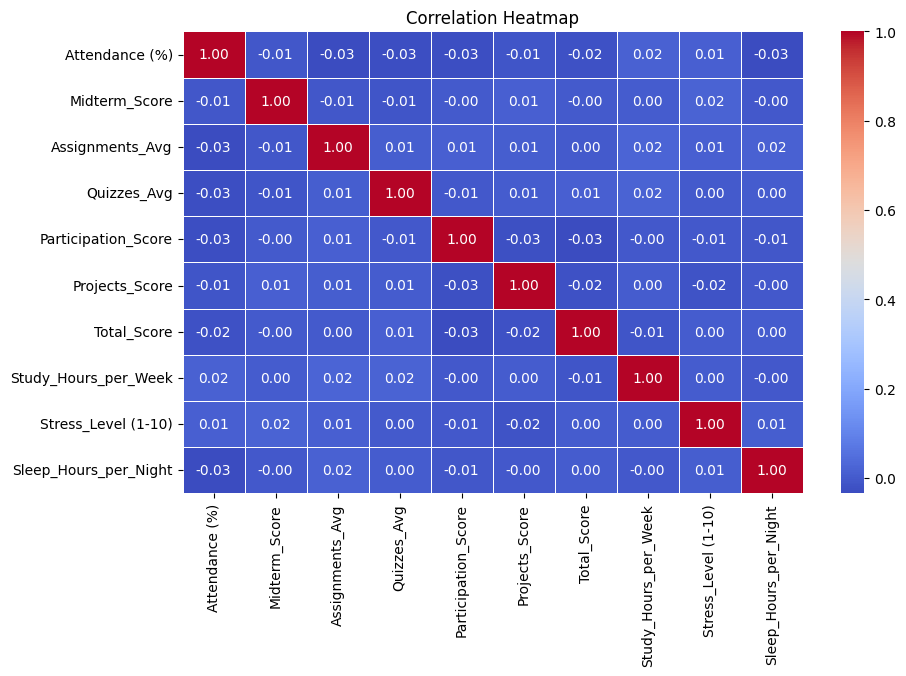

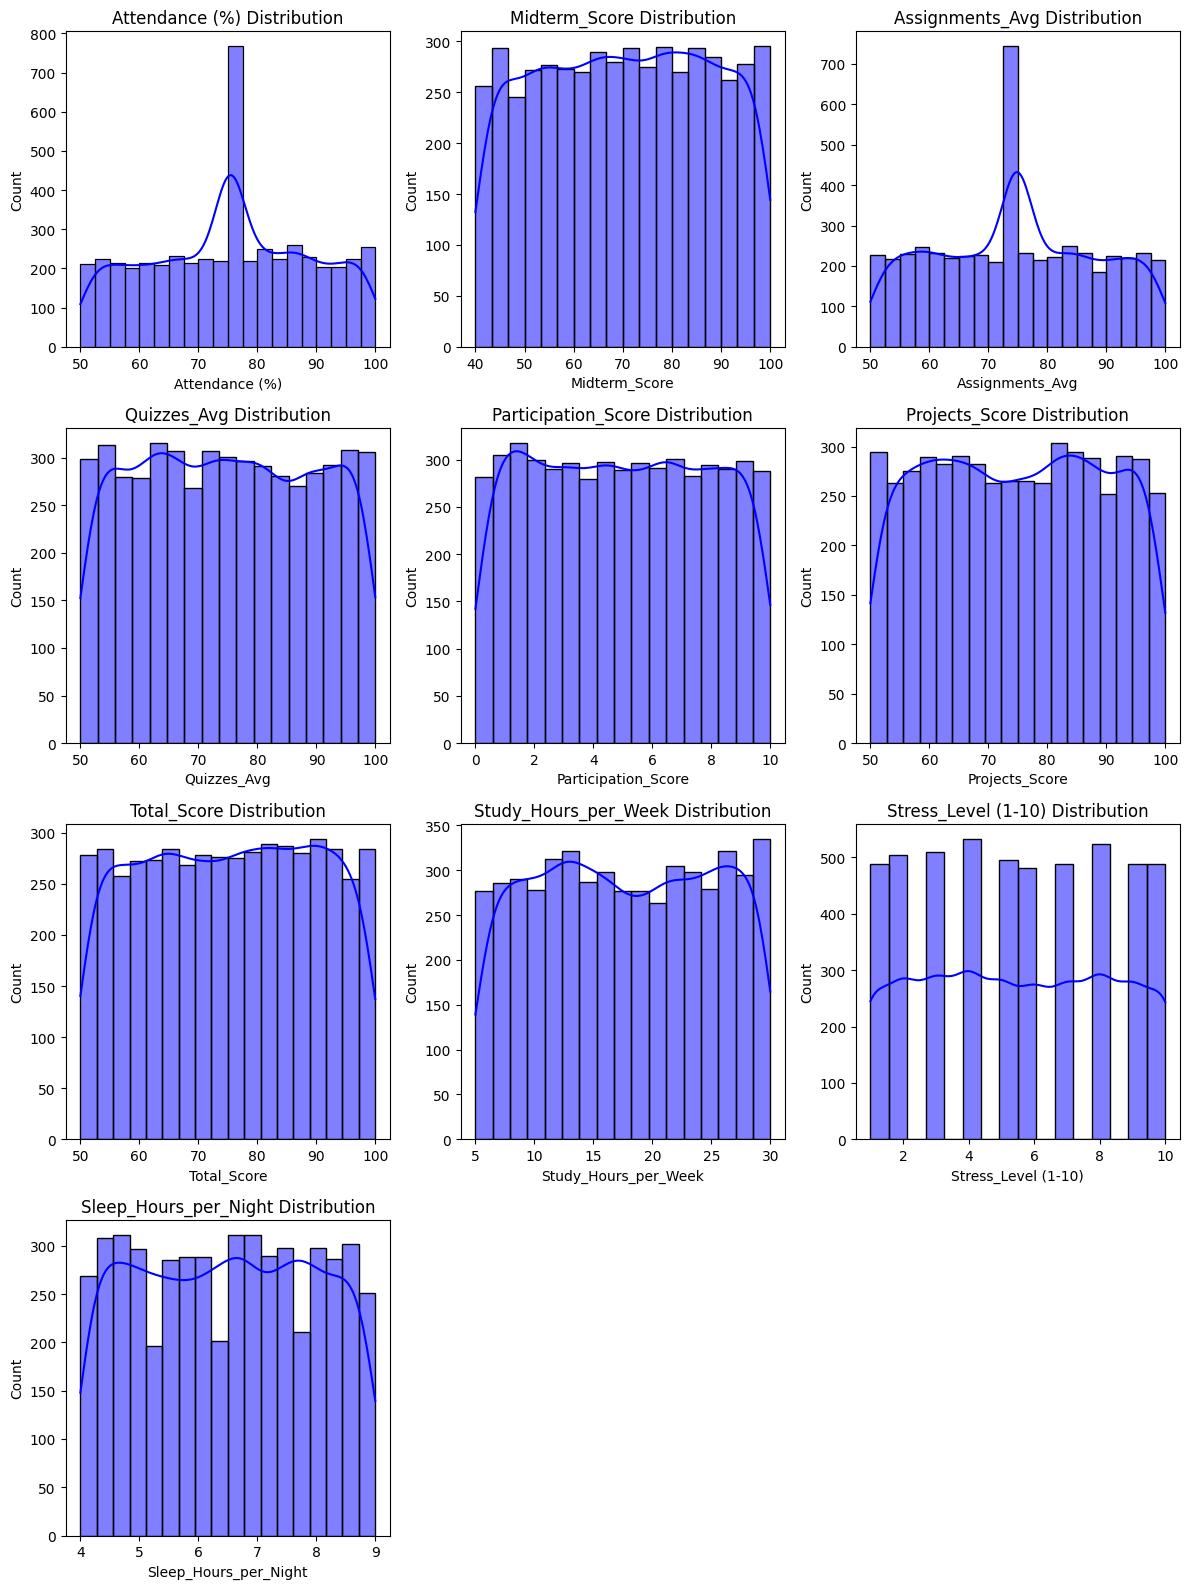

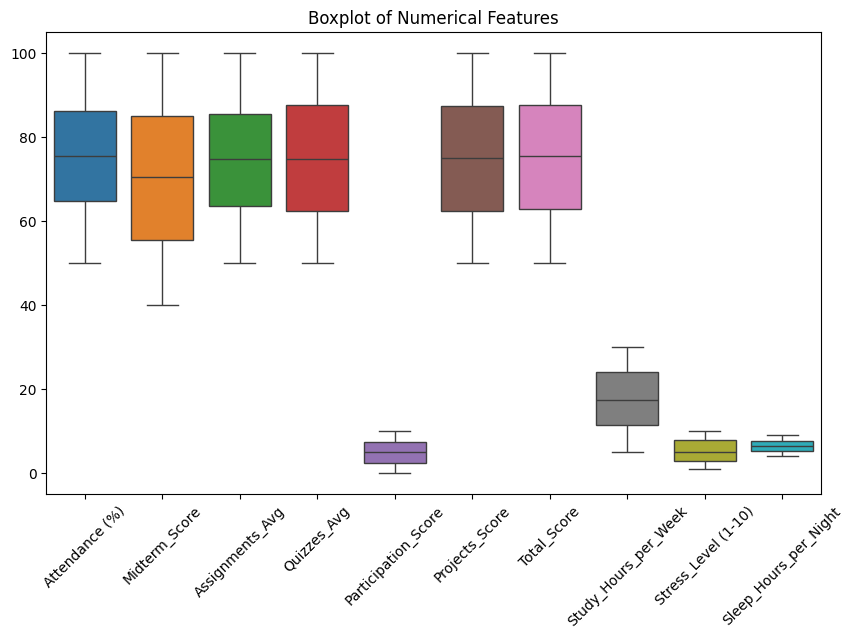

In [86]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=["number"]).columns

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Determine the number of subplots needed
num_columns = len(numerical_columns)
num_rows = int(np.ceil(num_columns / 3))  # Adjust the number of rows to fit all columns

# Distribution of key numerical columns (histograms)
plt.figure(figsize=(12, num_rows * 4))  # Dynamically adjust figure height based on the number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Create a grid of 3 columns
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'{column} Distribution')
    plt.tight_layout()
plt.show()

# Boxplot for checking outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

Trainining the model Using Gradient Desent

Training Loss: 102.3063612915536
Testing Loss: 108.58582657880741
Training R-squared: 0.0013040425059396288
Testing R-squared: -0.0004967702626326176
Training RMSE: 14.304290355802596
Testing RMSE: 14.736744998730718


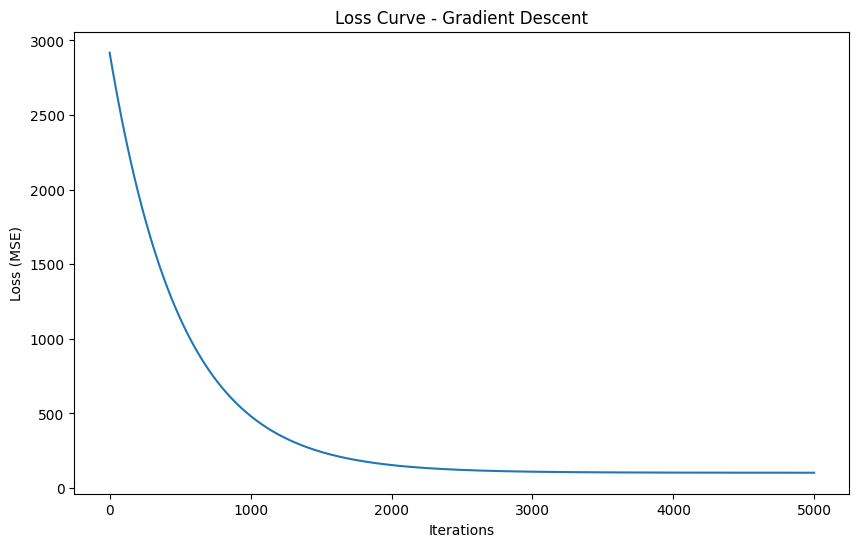

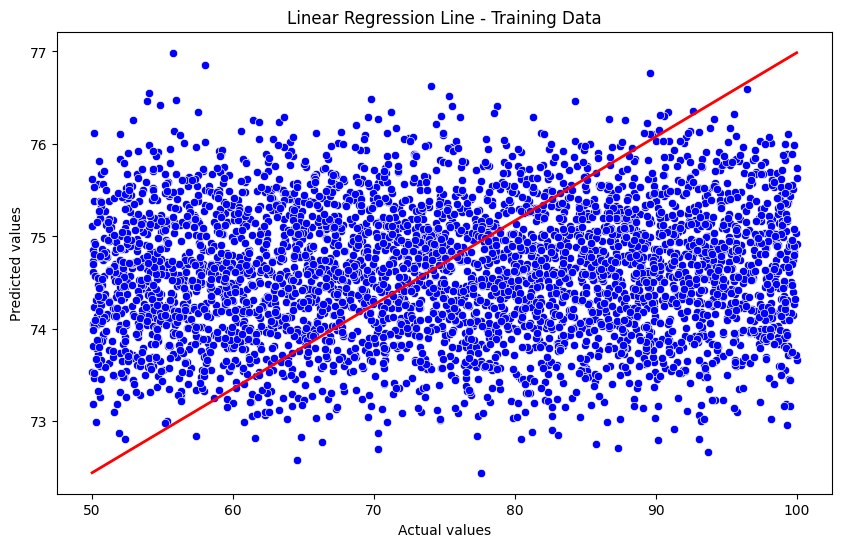

In [87]:
# ... (load and preprocess your data)

# Step 1: Prepare the data
# Make sure Total_Score is excluded from the input features (X)
X = df[numerical_columns].drop(columns=["Total_Score"], errors="ignore")  # Drop Total_Score if it's in numerical_columns
y = df['Total_Score']  # Total_Score is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the Linear Regression Model and Cost Function
class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, iterations=5000):  # Adjusted learning rate and iterations
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.loss_history = []  # Store loss at each iteration

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            dw = (1 / m) * np.dot(X.T, error)
            db = (1 / m) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store loss at each iteration
            self.loss_history.append(self.calculate_loss(X, y))

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def calculate_loss(self, X, y):
        y_pred = self.predict(X)
        return (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)

# Step 3: Train the Linear Regression Model
lr_model = LinearRegressionGD()  # Using default adjusted parameters
lr_model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the Model
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

train_loss = lr_model.calculate_loss(X_train_scaled, y_train)
test_loss = lr_model.calculate_loss(X_test_scaled, y_test)

print(f"Training Loss: {train_loss}")
print(f"Testing Loss: {test_loss}")

# Calculate R-squared and RMSE
train_r2 = r2_score(y_train, y_train_pred_lr)
test_r2 = r2_score(y_test, y_test_pred_lr)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")

# Step 5: Plotting the Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(range(lr_model.iterations), lr_model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve - Gradient Descent")
plt.show()

# Step 6: Plotting the Final Linear Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred_lr, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred_lr), max(y_train_pred_lr)], color='red', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression Line - Training Data")
plt.show()

Random Forest Model

In [88]:
# Step 2: Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators (trees) if needed

# Step 3: Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred_rf)
test_r2 = r2_score(y_test, y_test_pred_rf)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Print evaluation metrics
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")

Training R-squared: 0.8553059480736945
Testing R-squared: -0.029190290550257902
Training RMSE: 5.444713226485855
Testing RMSE: 14.946570788868263


Decision Trees Model

In [89]:
# Step 1: Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Step 2: Train the Decision Tree model
dt_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test set
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred_dt)
test_r2 = r2_score(y_test, y_test_pred_dt)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

# Print evaluation metrics
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")


Training R-squared: 1.0
Testing R-squared: -1.0527912204211858
Training RMSE: 0.0
Testing RMSE: 21.108924858931115


save the model with the least loss

In [90]:
# Calculate Mean Squared Error (MSE) for each model
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
mse_lr = mean_squared_error(y_test, y_test_pred_lr)

# Print MSE for each model
print(f"Decision Tree MSE: {mse_dt}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Linear Regression MSE: {mse_lr}")

# Identify the model with the least loss
least_loss_model = min([('Decision Tree', mse_dt, dt_model), 
                        ('Random Forest', mse_rf, rf_model), 
                        ('Linear Regression', mse_lr, lr_model)], key=lambda x: x[1])

# Print the model with the least loss
print(f"Model with the least loss: {least_loss_model[0]} with MSE: {least_loss_model[1]}")

# Save the model with the least loss
model_filename = f"{least_loss_model[0].replace(' ', '_')}_model.pkl"
joblib.dump(least_loss_model[2], model_filename)
print(f"Saved the model with the least loss as: {model_filename}")

Decision Tree MSE: 445.58670870000003
Random Forest MSE: 223.39997834665002
Linear Regression MSE: 217.1716531576148
Model with the least loss: Linear Regression with MSE: 217.1716531576148
Saved the model with the least loss as: Linear_Regression_model.pkl


prediction for one data point

In [91]:
# Load the model with the least loss (the one saved previously)
model_filename = f"{least_loss_model[0].replace(' ', '_')}_model.pkl"
best_model = joblib.load(model_filename)

# Select one random data point from the test set
random_index = np.random.randint(0, len(X_test))  # Random index
test_data_point = X_test.iloc[random_index].values.reshape(1, -1)  # Reshape for single prediction

# Make a prediction for the selected data point
prediction = best_model.predict(test_data_point)

# Print the prediction and the actual value
print(f"Prediction for the test data point (Index {random_index}): {prediction}")
print(f"Actual value for the test data point (Index {random_index}): {y_test.iloc[random_index]}")


Prediction for the test data point (Index 654): [37.48175825]
Actual value for the test data point (Index 654): 96.03


the scatter plot with the linear regression line

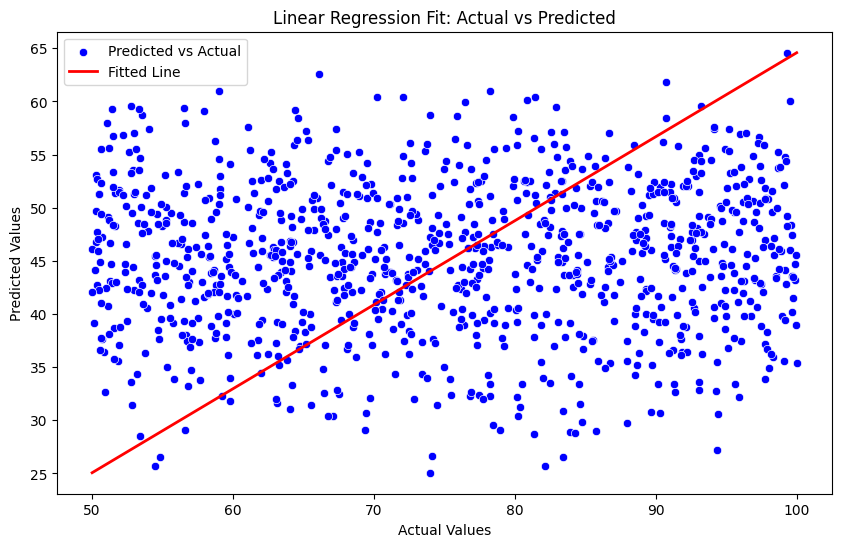

In [92]:
# Make predictions for the entire test set using the best model (Linear Regression)
y_test_pred_lr = best_model.predict(X_test)

# Create a scatter plot to visualize the final linear regression fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_lr, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test_pred_lr), max(y_test_pred_lr)], color='red', lw=2, label="Fitted Line")

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Fit: Actual vs Predicted")
plt.legend()

# Show the plot
plt.show()

In [93]:
print(X_train.columns)

Index(['Attendance (%)', 'Midterm_Score', 'Assignments_Avg', 'Quizzes_Avg',
       'Participation_Score', 'Projects_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')
